![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)


----

# Exploración de datos. Trabajamos con fechas. Ejemplo básico.
**Programa Ahora 12**
Ministerio de Desarrollo Productivo. Secretaria de Comercio Interior. Subsecretaría de Políticas para el Mercado Interno. Dirección Nacional de Políticas para el Desarrollo del Mercado Interno. 

Información sobre operaciones y facturación del Programa Ahora 12, desagregados por rubro y provincia.

Utilizaremos el conjunto de datos disponible en [Datos Abiertos del Ministerio de Desarrollo Productivo / Dataset / Recurso](https://datos.produccion.gob.ar/dataset/f3de9daa-f899-4132-9b42-5d245249bba2/archivo/644bd06d-b7d0-4d63-a00b-88561dc6079c). Hemos subido una copia al aula del curso para facilitar su acceso remoto, con una modificaciónal ser de dato original, al cuál le agregué el dato del día, en el campo fecha. Esto ultimo con le objetivo de hacer un poco más completo el ejemplo.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
#sbn.set_context('talk')

In [4]:
a12 = pd.read_csv('https://drive.google.com/uc?export=download&id=1Yo3OI7YBTr3Rv4PJHF4KhzMBcMNfK_u_',encoding='latin-1', sep=';')
a12[:15]
#https://drive.google.com/file/d/1Yo3OI7YBTr3Rv4PJHF4KhzMBcMNfK_u_/view?usp=sharing

,id_orig,provincia,rubro A12,facturacion,fecha
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019
1,2,BUENOS AIRES,Artículos de librería,4657723,4/1/2019
2,3,BUENOS AIRES,Balnearios,5839079,11/1/2019
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019
5,6,BUENOS AIRES,Colchones,53323671,13/1/2019
6,7,BUENOS AIRES,Electrodomésticos,439238382,10/1/2019
7,8,BUENOS AIRES,Indumentaria,1160938790,29/1/2019
8,9,BUENOS AIRES,Instrumentos musicales,2273994,26/1/2019
9,10,BUENOS AIRES,Juguetes y Juegos de mesa,68559650,17/1/2019


In [5]:
a12.columns
#a12.columns.to_native_types
print(a12.dtypes)
#si defino cmo variable de interés la facturación, verifico que se encuentre definida como variable, float
a12.describe(include='all') # entrega estadística descriptiva para todos los campos sin importar el tipo

id_orig          int64
provincia       object
rubro A12       object
facturacion      int64
fecha           object
dtype: object


,id_orig,provincia,rubro A12,facturacion,fecha
count,13560.00000,13560,13560,1.356000e+04,13560
unique,NaN,24,33,NaN,842
top,NaN,BUENOS AIRES,Colchones,NaN,2/1/2021
freq,NaN,650,672,NaN,42
mean,6780.50000,NaN,NaN,8.573787e+07,NaN
std,3914.57916,NaN,NaN,4.406132e+08,NaN
min,1.00000,NaN,NaN,1.000000e+00,NaN
25%,3390.75000,NaN,NaN,8.032885e+05,NaN
50%,6780.50000,NaN,NaN,4.683592e+06,NaN
75%,10170.25000,NaN,NaN,2.879002e+07,NaN


Agregamos una columna con la facturación en "millones de pesos"

In [6]:
a12['facturacion'] = a12['facturacion '].astype(float)  ## cuidado!! aquí, además estamos corrigiendo la escritura del nombre de la variable, que tiene un espacio en blanco al final!
a12.columns

Index(['id_orig', 'provincia', 'rubro A12', 'facturacion ', 'fecha',
       'facturacion'],
      dtype='object')

In [7]:
a12["fact_millones"]=a12["facturacion"]/1000000
a12[:10]

,id_orig,provincia,rubro A12,facturacion,fecha,facturacion,fact_millones
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019,3.087882e+07,30.878823
1,2,BUENOS AIRES,Artículos de librería,4657723,4/1/2019,4.657723e+06,4.657723
2,3,BUENOS AIRES,Balnearios,5839079,11/1/2019,5.839079e+06,5.839079
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019,2.064515e+07,20.645150
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019,2.290758e+08,229.075801
5,6,BUENOS AIRES,Colchones,53323671,13/1/2019,5.332367e+07,53.323671
6,7,BUENOS AIRES,Electrodomésticos,439238382,10/1/2019,4.392384e+08,439.238382
7,8,BUENOS AIRES,Indumentaria,1160938790,29/1/2019,1.160939e+09,1160.938790
8,9,BUENOS AIRES,Instrumentos musicales,2273994,26/1/2019,2.273994e+06,2.273994
9,10,BUENOS AIRES,Juguetes y Juegos de mesa,68559650,17/1/2019,6.855965e+07,68.559650


Visualizamos la variable de interés...

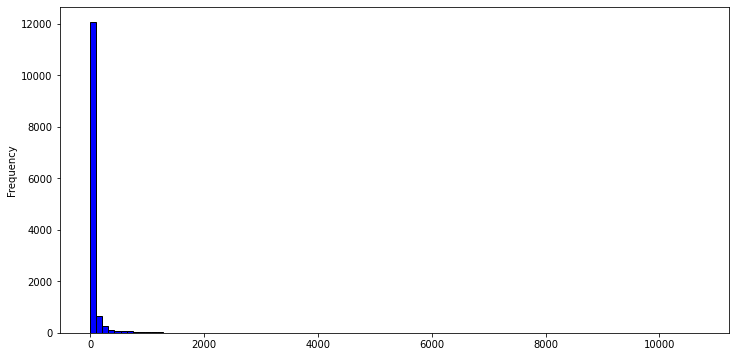

In [8]:
#sbn.histplot(a12.Fact_millones) # no se visualiza correctamente por la existencia de valores extremos.
a12['fact_millones'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='blue',edgecolor='black')

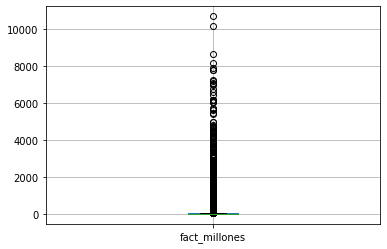

In [9]:
a12.boxplot('fact_millones') # se pierde la correcta visualización de la caja por valores muy extremos

** Hay valores realmente grades que dificultan visualizar el comportamiento de la variable.
Una manera de identificar **valores extremos** consideremos aquellos observados en el set de datos que superen 3 veces el recorrido intercuartílico, de manera que dicho límite será:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


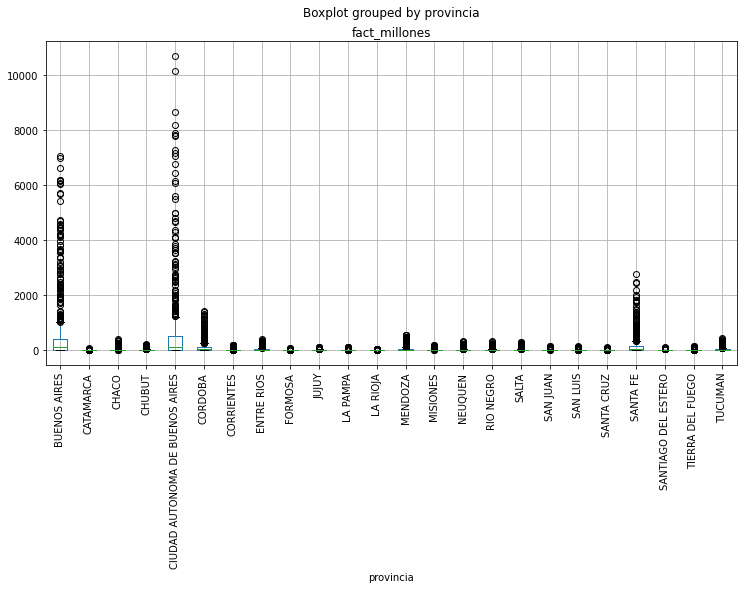

In [13]:
boxplot = a12.boxplot(column=['fact_millones'],by='provincia', figsize=(12,6), return_type='axes',rot=90)

In [14]:
# RI=Q3-Q1  Recorrido intrecuartilico. Luego LSE= Q3+3*RI  Es decir, el límite superior para valores extremos serán una barrera 
# a partir de la cuál cualquier valor observado que supere dicho límite será considerado "extremo" para el conjunto de datos analizado.

Q1=a12.fact_millones.quantile(q=0.25)
Q3=a12.fact_millones.quantile(q=0.75)
LSE=Q3+3*(Q3-Q1)
print(LSE,Q1,Q3)


112.7502125 0.8032885000000001 28.7900195


Notemos que existen valores que superan dicho limíte y vamos a reducir el conjunto de datos de manera que queden eliminado los valores extremos.

In [15]:
pd.value_counts(a12['fact_millones']< LSE.sum()).sort_index()


False     1439
True     12121
Name: fact_millones, dtype: int64

Vemos que encontramos 1439 valores extremos. Que podríamos omitir o exlcuir , a priori para mejorar la visualiación de variable. No necesariamente para análisis posteriores.


In [17]:
a12_visual = a12[a12['fact_millones']< LSE]
print(a12_visual.shape)

(12121, 7)


Volvemos a graficar, con el conjunto reducido.

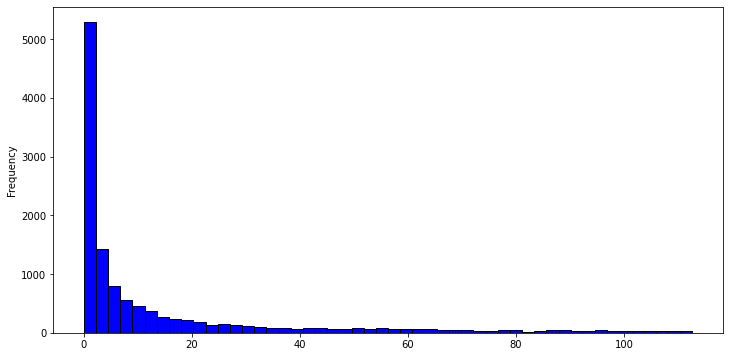

In [18]:
#sbn.histplot(a12_visual.fact_millones)  #con Seaborn
a12_visual['fact_millones'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

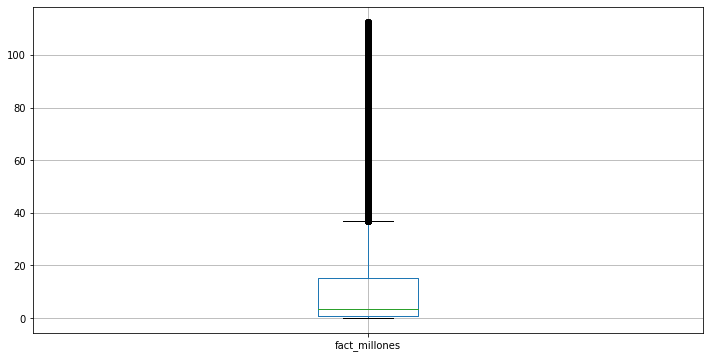

In [19]:
a12_visual.boxplot('fact_millones',figsize=(12,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


fact_millones    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

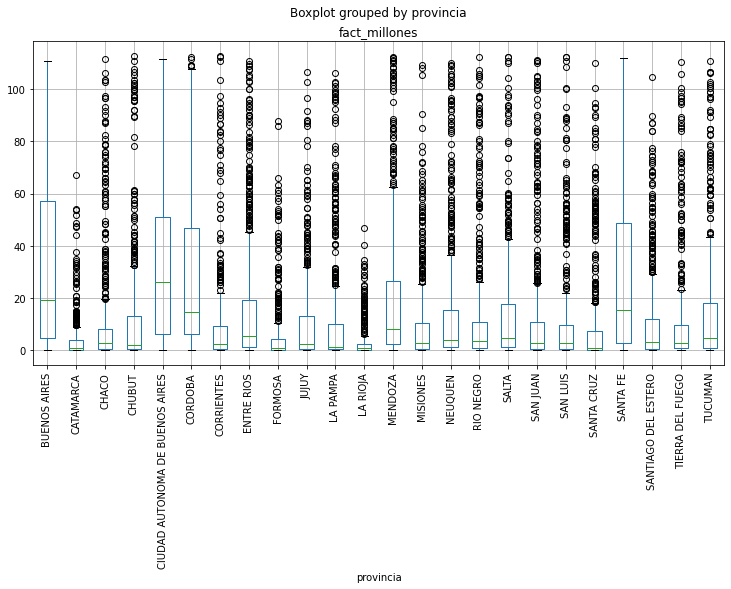

In [20]:
a12_visual.boxplot('fact_millones',by='provincia', figsize=(12,6), return_type='axes',rot=90)

Quitando los valores extremos, notar que mejora la visualización. La facturación separada por provincias muestra algo a considerar, ¿Por qué la facturación en Bueno Aires, CABA, Córdoba (casi) y Santa Fe no presentan valores outliers? (Recoradar que sólo eliminamos los extremos.)



## Fechas - Volvamos al conjunto de datos completo *a12* 

Las fechas representan la variable *tiempo*, cuya representación tiene varias aristas

* ¿Cómo afecta el tiempo en el problema que quiero estudiar?
* ¿Es importante de manera absoluta o de manera relativa?
* ¿Con qué nivel de precisión (o con qué escala) sería apropiado trabajar con la variable tiempo? ¿Años, días, minutos?
* ¿La zona horaria es importante?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) está la variable "fecha" en este conjunto de datos:

id_orig            int64
provincia         object
rubro A12         object
facturacion        int64
fecha             object
facturacion      float64
fact_millones    float64
dtype: object


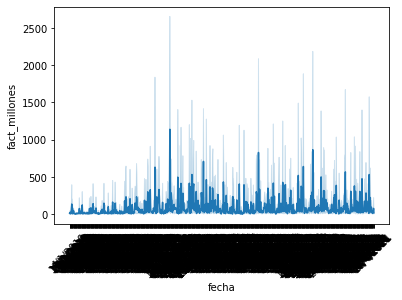

In [26]:
print(a12.dtypes)
sbn.lineplot(data=a12, x='fecha', y='fact_millones') # Grafico de lineas  de seaborn- Por defecto usa "estimator='mean'"!
plt.xticks(rotation=45);   # qué opinan sobre la calidad de gráfico que obtenemos?

Para evitar que las fechas sean reconocidas como strings. Podemos cambiar el tipo de datos de la columna fecha a `datetime` (castear). 
Datetime  funciona como estructura de datos diseñada para trabajar con fechas hasta una precisión de milisegundos.

In [27]:
a12['date'] = pd.to_datetime(a12.fecha)

Ahora la nueva columna *date*   tiene formato   "datetime64"

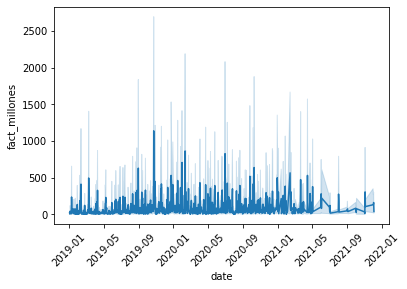

In [30]:
sbn.lineplot(data=a12, x='date', y='fact_millones')
plt.xticks(rotation=45);

Logramos representar la facturación a traves del tiempo, pero día a día- se representa por defecto la facturación promedio por día. 

Pero, adicionalmente podemos considerar que el "día" no es importante para este conjunto de datos, y que sólo está aportando ruido.

Para extraer sólo el mes-año de una fecha, aplicamos la función siguiente:

In [33]:
#a12['anio-mes'] = pd.to_datetime(a12.date.dt.strftime('%Y-%m')) # cuidado correr sólo una vez y luego comentar
a12.head()

,id_orig,provincia,rubro A12,facturacion,fecha,facturacion,fact_millones,date,mes,anio-mes
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019,30878823.0,30.878823,2019-01-15,2019-01-01,2019-01-01
1,2,BUENOS AIRES,Artículos de librería,4657723,4/1/2019,4657723.0,4.657723,2019-04-01,2019-04-01,2019-04-01
2,3,BUENOS AIRES,Balnearios,5839079,11/1/2019,5839079.0,5.839079,2019-11-01,2019-11-01,2019-11-01
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019,20645150.0,20.645150,2019-01-15,2019-01-01,2019-01-01
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019,229075801.0,229.075801,2019-01-19,2019-01-01,2019-01-01


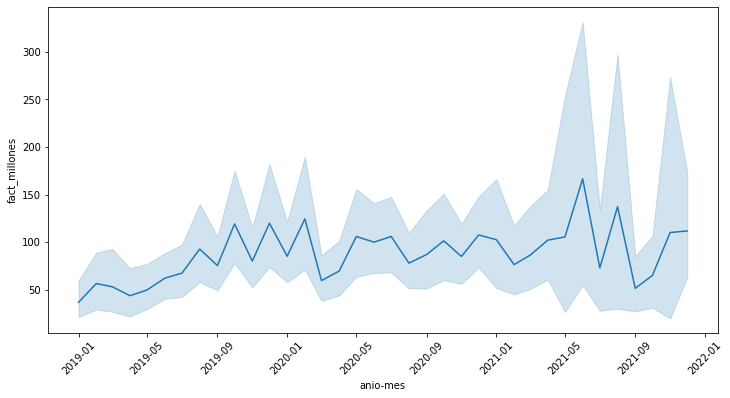

In [36]:
fig = plt.figure(figsize=(12, 6))
sbn.lineplot(data=a12.sort_values('anio-mes'), x='anio-mes', y='fact_millones')
plt.xticks(rotation=45);

Notar que la línea representa la estimación puntual de la facturación promedio para el mes_año y las zonas celeste por encima y por debajo de la linea represeten los intervalos de confianza para dichas estimaciones. Por defecto considera IC con 1-alpha= 95%.  Si desea modificar pude agregar el argumento ci=90 por ejemplo...  


En lugar de utilizar una precisión de meses, podríamos requerir utilizar cuatrimestres para representar la facturación. 

Realizar una visualización del cambio de precios con respecto al año y al cuatrimestre.


In [52]:
import time
from datetime import date
today = pd.Timestamp("20210622") # estoy podría ser dinámico usando datetime.today()


In [54]:
a12['tiempo']=today-a12['date'] #Agrega la variable tiempo...calcula la cantidad de días trasncurridos desde "date" hasta "today"
a12.head() 

,id_orig,provincia,rubro A12,facturacion,fecha,facturacion,fact_millones,date,mes,anio-mes,tiempo
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019,30878823.0,30.878823,2019-01-15,2019-01-01,2019-01-01,889 days
1,2,BUENOS AIRES,Artículos de librería,4657723,4/1/2019,4657723.0,4.657723,2019-04-01,2019-04-01,2019-04-01,813 days
2,3,BUENOS AIRES,Balnearios,5839079,11/1/2019,5839079.0,5.839079,2019-11-01,2019-11-01,2019-11-01,599 days
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019,20645150.0,20.645150,2019-01-15,2019-01-01,2019-01-01,889 days
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019,229075801.0,229.075801,2019-01-19,2019-01-01,2019-01-01,885 days


## Mas información consultar en:
[datetime — Basic date and time types](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior.\)



Otros ejemplos sencillos...

In [205]:
pd.period_range(start='2017-01-01', end='2018-01-01', freq='M')
pd.PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
         '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
         '2018-01'],
        dtype='period[M]', freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01'],
            dtype='period[M]', freq='M')

In [206]:
pd.period_range(start=pd.Period('2017Q1', freq='Q'),
                end=pd.Period('2017Q2', freq='Q'), freq='M')
pd.PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06'],
            dtype='period[M]', freq='M')

PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06'], dtype='period[M]', freq='M')